# Test UK police client

In [260]:
# import package
from police_api import PoliceAPI, Crime
import re
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from mpl_toolkits.axes_grid1 import make_axes_locatable
import requests

# utility functions: new_get_crimes_area
import utlities

## A new function that replaces get_crimes_area

In [214]:
# test new_get_crimes_area
boundary_test = [(52.268, 0.543),
         (52.794,0.238),
         (52.130,0.478)]
crimes_test = new_get_crimes_area(boundary_test)
print(len(crimes_test))
crimes_test = new_get_crimes_area(boundary_test, '2021-10')
print(len(crimes_test))
crimes_test = new_get_crimes_area(boundary_test, ['2021-1', '2021-10'])
print(len(crimes_test))

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): data.police.uk:443
DEBUG:urllib3.connectionpool:https://data.police.uk:443 "POST /api/crimes-street/all-crime HTTP/1.1" 200 4894
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): data.police.uk:443


71


DEBUG:urllib3.connectionpool:https://data.police.uk:443 "POST /api/crimes-street/all-crime HTTP/1.1" 200 7289
DEBUG:police_api.service:GET http://data.police.uk/api/crime-categories
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): data.police.uk:80
DEBUG:urllib3.connectionpool:http://data.police.uk:80 "GET /api/crime-categories?date=2021-10 HTTP/1.1" 301 134
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): data.police.uk:443
DEBUG:urllib3.connectionpool:https://data.police.uk:443 "GET /api/crime-categories?date=2021-10 HTTP/1.1" 200 296
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): data.police.uk:443


114


DEBUG:urllib3.connectionpool:https://data.police.uk:443 "POST /api/crimes-street/all-crime HTTP/1.1" 200 5563
DEBUG:police_api.service:GET http://data.police.uk/api/crime-categories
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): data.police.uk:80
DEBUG:urllib3.connectionpool:http://data.police.uk:80 "GET /api/crime-categories?date=2021-01 HTTP/1.1" 301 134
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): data.police.uk:443
DEBUG:urllib3.connectionpool:https://data.police.uk:443 "GET /api/crime-categories?date=2021-01 HTTP/1.1" 200 296
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): data.police.uk:443
DEBUG:urllib3.connectionpool:https://data.police.uk:443 "POST /api/crimes-street/all-crime HTTP/1.1" 200 7289


202


In [5]:
api = PoliceAPI()

In [3]:
# get the forces
list_force = api.get_forces()

In [22]:
list_force[0].__class__

police_api.forces.Force

In [16]:
# get the force of Merseyside
force_mersey = api.get_force('merseyside')

In [19]:
force_mersey

<Force> Merseyside Police

According to this [webpage](https://www.merseyside.police.uk/police-forces/merseyside-police/areas/au/about-us/): Merseyside Police is split into five local policing teams - Wirral, Sefton, Knowsley, St Helens and Liverpool.  Each area has a combination of community policing teams, response teams and criminal investigations units.

The code below lists all neighbourhoods in Merseyside Police. There are 10 neighhourhoods, four of which are in Liverpool.

In [21]:
for nei in force_mersey.neighbourhoods:
    print("{0} -- {1}".format(nei.id, nei.name))

C1C2C3 -- Knowsley Community Police Team
E7E8E9 -- Liverpool Community Police Team - Hub Four
E1E3 -- Liverpool Community Police Team - Hub One
E5E6 -- Liverpool Community Police Team - Hub Three
E2E4 -- Liverpool Community Police Team - Hub Two
B1 -- Sefton Community Police Team - Hub One
B3 -- Sefton Community Police Team - Hub Two
D1D2D3 -- St Helens Community Police Team
A1A2 -- Wirral Community Police Team - Hub One
A3A4 -- Wirral Community Police Team - Hub Two


In [18]:
# neighbourhood
force_mersey.neighbourhoods

[<Neighbourhood> C1C2C3,
 <Neighbourhood> E7E8E9,
 <Neighbourhood> E1E3,
 <Neighbourhood> E5E6,
 <Neighbourhood> E2E4,
 <Neighbourhood> B1,
 <Neighbourhood> B3,
 <Neighbourhood> D1D2D3,
 <Neighbourhood> A1A2,
 <Neighbourhood> A3A4]

In [33]:
print(nbh_liverpool_hubone.boundary.__class__)
print(nbh_liverpool_hubone.boundary[0].__class__)

<class 'list'>
<class 'tuple'>


In [35]:
[p[0] for p in nbh_liverpool_hubone.boundary[0]]

53.443247955179

### Which neighbourhood has the most crime in 2021?

In [38]:
list_coord = nbh_liverpool_hubone.boundary
poly_test = Polygon([[p[0], p[1]] for p in list_coord])

In [218]:
# get crime between 2021-01-01 to 2021-12-31
months_2021 = ['2021-{}'.format(month) for month in range(1,13)]

In [220]:
# get the boundary of one neighbourhoods and plot
df = pd.DataFrame(columns=['id', 'name', 'n_crime_2021', 'geometry'])
for idx,nbh in enumerate(force_mersey.neighbourhoods):
    # id, name, geometry
    df.loc[idx, "id"] = nbh.id
    df.loc[idx, "name"] = nbh.name
    df.loc[idx, 'n_crime_2021'] = len(new_get_crimes_area(nbh.boundary, list_date=months_2021))
    df.loc[idx, "geometry"] = Polygon([[p[1], p[0]] for p in nbh.boundary]) # p[1] is longitude, p[2] is latitude

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): data.police.uk:443
DEBUG:urllib3.connectionpool:https://data.police.uk:443 "POST /api/crimes-street/all-crime HTTP/1.1" 200 77885
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): data.police.uk:443
DEBUG:urllib3.connectionpool:https://data.police.uk:443 "POST /api/crimes-street/all-crime HTTP/1.1" 200 78271
DEBUG:police_api.service:GET http://data.police.uk/api/crime-categories
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): data.police.uk:80
DEBUG:urllib3.connectionpool:http://data.police.uk:80 "GET /api/crime-categories?date=2021-02 HTTP/1.1" 301 134
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): data.police.uk:443
DEBUG:urllib3.connectionpool:https://data.police.uk:443 "GET /api/crime-categories?date=2021-02 HTTP/1.1" 200 296
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): data.police.uk:443
DEBUG:urllib3.connectionpool:https://data.police.uk:443 "POST /api/

<AxesSubplot:>

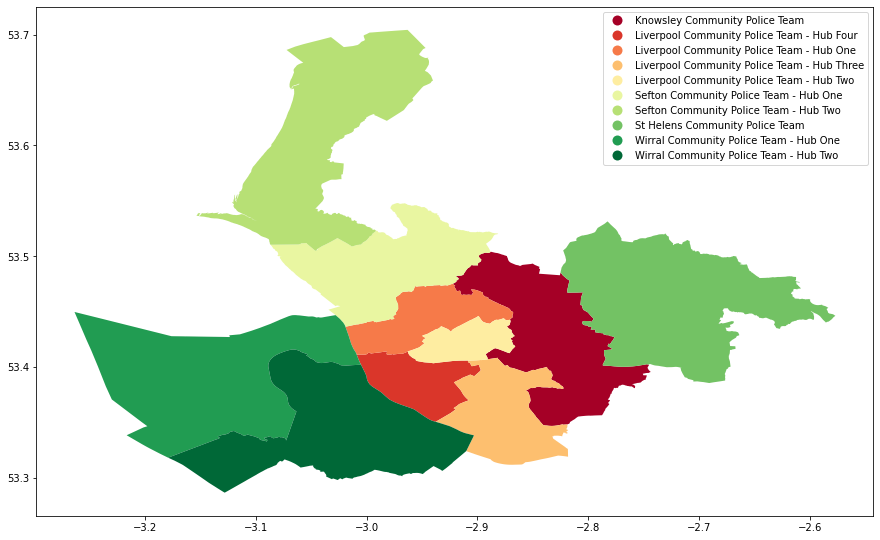

In [221]:
gdf = gpd.GeoDataFrame(df, geometry=df.geometry)
# figure(figsize=(20, 10))
fig, ax = plt.subplots(1, figsize=(15, 15))
# fig, ax1 = plt.subplots(1, figsize=(12, 10))   # create figure and axes for Matplotlib 

# gdf.plot()
# gdf.plot("name", cmap="RdYlGn", ax=ax, legend=False, figsize=(15, 10))
gdf.plot("name", cmap="RdYlGn", ax=ax, legend=True)
# divider = make_axes_locatable(ax)

# cax = divider.append_axes("right", size="5%", pad=0.1)

# gdf.plot(column='name', ax=ax, legend=False, cax=cax)

In [224]:
df[['id', 'name', 'n_crime_2021']]

,id,name,n_crime_2021
0,C1C2C3,Knowsley Community Police Team,18054
1,E7E8E9,Liverpool Community Police Team - Hub Four,29101
2,E1E3,Liverpool Community Police Team - Hub One,24925
3,E5E6,Liverpool Community Police Team - Hub Three,9415
4,E2E4,Liverpool Community Police Team - Hub Two,15750
5,B1,Sefton Community Police Team - Hub One,18743
6,B3,Sefton Community Police Team - Hub Two,11231
7,D1D2D3,St Helens Community Police Team,23373
8,A1A2,Wirral Community Police Team - Hub One,14310
9,A3A4,Wirral Community Police Team - Hub Two,19704


Among the four Liverpool neighbourhoods, ``Liverpool Community Police Team - Hub Four`` has the most crime incidents. So, two case study areas would be:

1. Liverpool Community Police Team - Hub Four (preferred)
2. The combination of the four Teams in Liverpool

## Saving crime data in hub four as CSV file

In [227]:
crimes_liverpool_hub_four = new_get_crimes_area(force_mersey.get_neighbourhood('E7E8E9').boundary, list_date=months_2021)

DEBUG:police_api.service:GET http://data.police.uk/api/merseyside/E7E8E9/boundary
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): data.police.uk:80
DEBUG:urllib3.connectionpool:http://data.police.uk:80 "GET /api/merseyside/E7E8E9/boundary HTTP/1.1" 301 134
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): data.police.uk:443
DEBUG:urllib3.connectionpool:https://data.police.uk:443 "GET /api/merseyside/E7E8E9/boundary HTTP/1.1" 200 11466
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): data.police.uk:443
DEBUG:urllib3.connectionpool:https://data.police.uk:443 "POST /api/crimes-street/all-crime HTTP/1.1" 200 99933
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): data.police.uk:443
DEBUG:urllib3.connectionpool:https://data.police.uk:443 "POST /api/crimes-street/all-crime HTTP/1.1" 200 91945
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): data.police.uk:443
DEBUG:urllib3.connectionpool:https://data.police.uk:443 "POST

In [240]:
# is this an ID from OS network?
print(crimes_liverpool_hub_four[0].location.street)
crime = crimes_liverpool_hub_four[0]
print(crime.location.latitude)
print(crime.month)
print(crime.location.street)

{'id': 906784, 'name': 'On or near Pedestrian Subway'}
53.373412
2021-01
{'id': 906784, 'name': 'On or near Pedestrian Subway'}


In [245]:
# important attributes: lat, long, date, street_id, street
def crime_to_dict(crime):
    if isinstance(crime, Crime):
        return {
            'lat': crime.location.latitude,
            'lng': crime.location.longitude,
            'date': crime.month,
            'street_id': crime.location.street['id'],
            'street_name': crime.location.street['name'],
        }
    else:
        return None

In [243]:
df_crime_liverpool_hub_four = pd.DataFrame(columns=['lat', 'lng', 'date', 'street_id', 'street_name'])

In [250]:
for crime in crimes_liverpool_hub_four:
    df_crime_liverpool_hub_four=df_crime_liverpool_hub_four.append(crime_to_dict(crime), ignore_index=True)

In [251]:
df_crime_liverpool_hub_four.head()

,lat,lng,date,street_id,street_name
0,53.373412,-2.934712,2021-01,906784,On or near Pedestrian Subway
1,53.400743,-2.941042,2021-01,910301,On or near Bannerman Street
2,53.400462,-2.911240,2021-01,909826,On or near Olive Mount Road
3,53.404521,-2.983077,2021-01,910318,On or near Old Post Office Place
4,53.409038,-2.985799,2021-01,911850,On or near Dale Street (queensway)


In [252]:
df_crime_liverpool_hub_four.to_csv('crimes_Liverpool_hub_four.csv', index=False)

In [256]:
gdf.columns

Index(['id', 'name', 'n_crime_2021', 'geometry'], dtype='object')

In [257]:
# save df as json file
with open('Merseyside_police_neighbourhood.geojson', 'w') as f:
    f.write(gdf.to_json())

## Playing with the get_crimes_area function (Not run)

In [89]:
list_date = api.get_dates()
print('Earliest month: {}'.format(list_date[-1]))
print('Latest month: {}'.format(list_date[0]))

Earliest month: 2019-03
Latest month: 2022-02


In [75]:
# get crime between 2021-01-01 to 2021-12-31
month_2021 = ['2021-{}'.format(month) for month in range(1,13)]

['2021-1', '2021-2', '2021-3', '2021-4', '2021-5', '2021-6', '2021-7', '2021-8', '2021-9', '2021-10', '2021-11', '2021-12']


In [179]:
# 52.268,0.543:52.794,0.238:52.130,0.478
boundary_test = [(52.268, 0.543),
         (52.794,0.238),
         (52.130,0.478)]
# boundary_test = [(52.268, 0.543)]
list_crime_test = api.get_crimes_area(boundary_test)

DEBUG:police_api.service:POST http://data.police.uk/api/crimes-street/all-crime
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): data.police.uk:80
DEBUG:urllib3.connectionpool:http://data.police.uk:80 "POST /api/crimes-street/all-crime HTTP/1.1" 301 134
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): data.police.uk:443
DEBUG:urllib3.connectionpool:https://data.police.uk:443 "GET /api/crimes-street/all-crime HTTP/1.1" 400 None


APIError: <unknown error code>

In [151]:
# succeed to get the requests
import requests
boundary_test = [(52.268, 0.543),
         (52.794,0.238),
         (52.130,0.478)]
poly = encode_polygon(boundary_test)
myobj = {'somekey': 'somevalue'}

# Test a simple example
# both requests.get and requests.post work!
url = 'https://data.police.uk:443/api/crimes-street/all-crime'
myobj = {'poly': poly}

x = requests.get(url, data = myobj)

In [173]:
# How about requests.request(verb, url, **request_kwargs)??
x = requests.request('POST', url, data=myobj)
try:
    x.raise_for_status()
except requests.models.HTTPError as e:
    raise APIError(e)

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): data.police.uk:443
DEBUG:urllib3.connectionpool:https://data.police.uk:443 "POST /api/crimes-street/all-crime HTTP/1.1" 200 4894


In [153]:
import logging
logging.basicConfig(level=logging.DEBUG)

In [156]:
# Example from here: https://police-api-client-python.readthedocs.io/en/latest/#crime-outcomes
# not working
force = api.get_force('leicestershire')
neighbourhood = force.neighbourhoods
boundary = neighbourhood[0].boundary

DEBUG:police_api.service:GET http://data.police.uk/api/leicestershire/neighbourhoods
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): data.police.uk:80
DEBUG:urllib3.connectionpool:http://data.police.uk:80 "GET /api/leicestershire/neighbourhoods HTTP/1.1" 301 134
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): data.police.uk:443
DEBUG:urllib3.connectionpool:https://data.police.uk:443 "GET /api/leicestershire/neighbourhoods HTTP/1.1" 200 899
DEBUG:police_api.service:GET http://data.police.uk/api/leicestershire/NW02/boundary
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): data.police.uk:80
DEBUG:urllib3.connectionpool:http://data.police.uk:80 "GET /api/leicestershire/NW02/boundary HTTP/1.1" 301 134
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): data.police.uk:443
DEBUG:urllib3.connectionpool:https://data.police.uk:443 "GET /api/leicestershire/NW02/boundary HTTP/1.1" 200 5082


In [262]:
from importlib import reload
reload(police_api)

<module 'police_api' from '/home/huanfa/miniconda3/envs/sds2021/lib/python3.9/site-packages/police_api/__init__.py'>

In [263]:
# error
list_crime = api.get_crimes_area(boundary)

DEBUG:police_api.service:POST http://data.police.uk/api/crimes-street/all-crime
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): data.police.uk:80
DEBUG:urllib3.connectionpool:http://data.police.uk:80 "POST /api/crimes-street/all-crime HTTP/1.1" 301 134
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): data.police.uk:443
DEBUG:urllib3.connectionpool:https://data.police.uk:443 "GET /api/crimes-street/all-crime HTTP/1.1" 400 None


APIError: <unknown error code>

In [95]:
# the original approach to call the API
url_test = "https://data.police.uk/api/crimes-street/all-crime?poly=52.268,0.543:52.794,0.238:52.130,0.478"
import urllib.request, json 
with urllib.request.urlopen(url_test) as url:
    data = json.loads(url.read().decode())
    print(data)

[{'category': 'anti-social-behaviour', 'location_type': 'Force', 'location': {'latitude': '52.344812', 'street': {'id': 564435, 'name': 'On or near Pound Lane'}, 'longitude': '0.409454'}, 'context': '', 'outcome_status': None, 'persistent_id': '', 'id': 99502239, 'location_subtype': '', 'month': '2022-02'}, {'category': 'anti-social-behaviour', 'location_type': 'Force', 'location': {'latitude': '52.338690', 'street': {'id': 557698, 'name': 'On or near The Pits'}, 'longitude': '0.412879'}, 'context': '', 'outcome_status': None, 'persistent_id': '', 'id': 99502594, 'location_subtype': '', 'month': '2022-02'}, {'category': 'anti-social-behaviour', 'location_type': 'Force', 'location': {'latitude': '52.302314', 'street': {'id': 1141357, 'name': 'On or near Laurel Close'}, 'longitude': '0.492662'}, 'context': '', 'outcome_status': None, 'persistent_id': '', 'id': 99531541, 'location_subtype': '', 'month': '2022-02'}, {'category': 'burglary', 'location_type': 'Force', 'location': {'latitude'

## Which neighbourhood has the most crime in 2021?

In [ ]:
df[['']]

## References:

https://github.com/rkhleics/police-api-client-python

